In [9]:
__file__ = 'rad_zu_ord_fit.ipynb'
import sys
import pathlib
sys.path.append(str(pathlib.Path(__file__).absolute().parent.parent)+"/FP2_lib")
import functions as f
import os
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from uncertainties import unumpy as up

In [10]:
with open('Data/Data.csv', mode='r') as tf:
    data = np.genfromtxt(tf,delimiter="\t").T

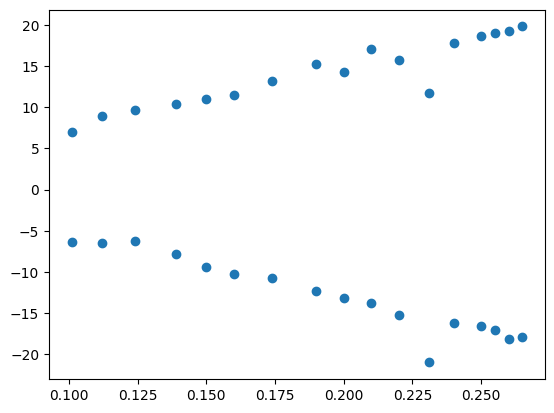

In [11]:
plt.scatter(data[0],data[3])

In [12]:
dat1 = []
mag1 = []
dat2 = []
mag2 = []
for i in range(len(data[0])):
    if i%2 == 0:
        mag1.append(data[0][i])
        dat1.append(data[3][i])
    elif i%2 != 0:
        mag2.append(data[0][i])
        dat2.append(data[3][i])
        

del mag1[11]
del dat1[11]
del mag2[11]
del dat2[11]

In [13]:
fillerr = np.full(len(dat1),0.1)
res1 = f.linear_fit(dat1,mag1,fillerr)
res2 = f.linear_fit(dat2,mag2,fillerr)

[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 4
    # data points      = 16
    # variables        = 2
    chi-square         = 338.107339
    reduced chi-square = 24.1505242
    Akaike info crit   = 52.8123951
    Bayesian info crit = 54.3575726
    R-squared          = -0.23091357
[[Variables]]
    slope:     -76.8291024 +/- 2.29226606 (2.98%) (init = -76.8291)
    intercept:  2.29554763 +/- 0.45390631 (19.77%) (init = 2.295548)
[[Correlations]] (unreported correlations are < 0.100)
    C(slope, intercept) = -0.963
[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 4
    # data points      = 16
    # variables        = 2
    chi-square         = 521.700871
    reduced chi-square = 37.2643479
    Akaike info crit   = 59.7520905
    Bayesian info crit = 61.2972680
    R-squared          = -1.02494152
[[Variables]]
    slope:      74.1078179 +/- 2.84740042 (3.84%) (init = 74.

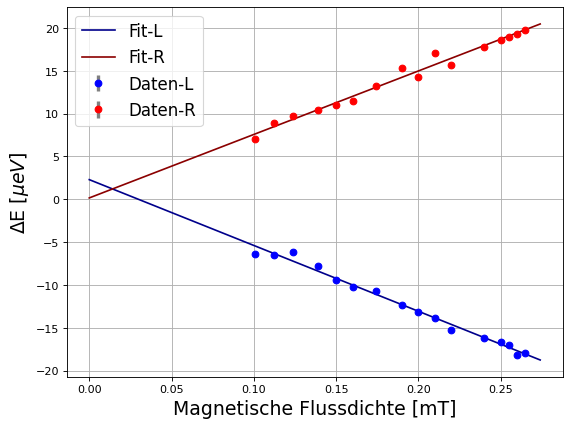

In [19]:
fig = plt.figure(figsize=(8,6),dpi=80,linewidth=50)

plt.plot(np.arange(0,0.275,0.001),res1.eval(x=np.arange(0,0.275,0.001)),color='darkblue',linestyle='-',alpha=1,label="Fit-L")
plt.plot(np.arange(0,0.275,0.001),res2.eval(x=np.arange(0,0.275,0.001)),color='darkred',linestyle='-',alpha=1,label="Fit-R")


plt.errorbar(mag1,dat1,yerr = fillerr,fmt='bo',ecolor='gray', elinewidth=3, capsize=0,label = 'Daten-L')
plt.errorbar(mag2,dat2,yerr = fillerr,fmt='ro',ecolor='gray', elinewidth=3, capsize=0,label = 'Daten-R')








plt.ylabel('$\Delta$E [$\mu eV$]',fontsize = 17)
plt.xlabel('Magnetische Flussdichte [mT]',fontsize = 17)
plt.grid()
plt.legend(fontsize = 15)

print(res1.fit_report())
print(res2.fit_report())